Week 2: Data Formats and Exploration
===============================================================

In [1]:
import uproot

In [2]:
f = uproot.open('root://eospublic.cern.ch//eos/opendata/cms/datascience/HiggsToBBNtupleProducerTool/HiggsToBBNTuple_HiggsToBB_QCD_RunII_13TeV_MC/train/ntuple_merged_10.root')

In [3]:
tree = f['deepntuplizer/tree']

In [4]:
tree.show()

Delta_gen_pt               (no streamer)              asdtype('>f4')
event_no                   (no streamer)              asdtype('>u4')
gen_pt                     (no streamer)              asdtype('>f4')
isB                        (no streamer)              asdtype('>i4')
isBB                       (no streamer)              asdtype('>i4')
isC                        (no streamer)              asdtype('>i4')
isG                        (no streamer)              asdtype('>i4')
isLeptonicB                (no streamer)              asdtype('>i4')
isLeptonicB_C              (no streamer)              asdtype('>i4')
isS                        (no streamer)              asdtype('>i4')
isUD                       (no streamer)              asdtype('>i4')
isUndefined                (no streamer)              asdtype('>i4')
jet_corr_pt                (no streamer)              asdtype('>f4')
jet_eta                    (no streamer)              asdtype('>f4')
jet_looseId                (no str

In [5]:
labels = tree.arrays(branches=['label_QCD_b', 
                               'label_QCD_bb', 
                               'label_QCD_c', 
                               'label_QCD_cc', 
                               'label_QCD_others', 
                               'label_H_bb', 
                               'sample_isQCD'], 
                     entrystop=20000)

In [6]:
# label QCD: require the sample to be QCD and any of the QCD flavors
label_QCD = labels[b'sample_isQCD'] * (labels[b'label_QCD_b']+labels[b'label_QCD_bb']+labels[b'label_QCD_c']+labels[b'label_QCD_cc']+labels[b'label_QCD_others'])

# label Hbb
label_Hbb = labels[b'label_H_bb']

In [7]:
# number of overlap events
sum(label_QCD*label_Hbb) 

0

In [8]:
# number of events with some truth label defined 
sum(label_QCD+label_Hbb)

18757

In [9]:
# total number of events 
len(label_QCD+label_Hbb)

20000

In [10]:
jet_features = tree.arrays(branches=['fj_pt', 
                                     'fj_sdmass',
                                     'fj_tau21'],
                          entrystop=20000)

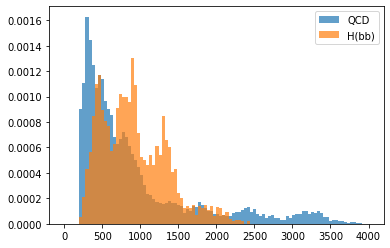

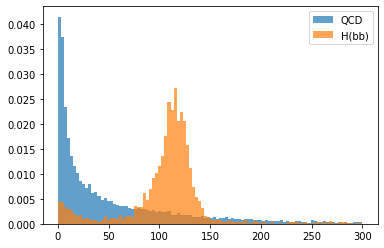

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

plt.hist(jet_features[b'fj_pt'],weights=label_QCD,bins=np.linspace(0,4000,101),density=True,alpha=0.7,label='QCD')
plt.hist(jet_features[b'fj_pt'],weights=label_Hbb,bins=np.linspace(0,4000,101),density=True,alpha=0.7,label='H(bb)')
plt.legend()

plt.figure()

plt.hist(jet_features[b'fj_sdmass'],weights=label_QCD,bins=np.linspace(0,300,101),density=True,alpha=0.7,label='QCD')
plt.hist(jet_features[b'fj_sdmass'],weights=label_Hbb,bins=np.linspace(0,300,101),density=True,alpha=0.7,label='H(bb)')
plt.legend()

plt.show()

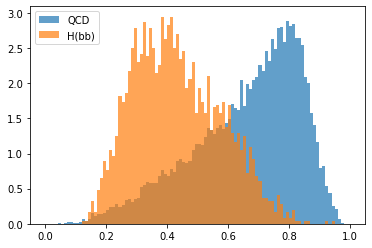

In [12]:
plt.figure()

plt.hist(jet_features[b'fj_tau21'],weights=label_QCD,bins=np.linspace(0,1,101),density=True,alpha=0.7,label='QCD')
plt.hist(jet_features[b'fj_tau21'],weights=label_Hbb,bins=np.linspace(0,1,101),density=True,alpha=0.7,label='H(bb)')
plt.legend()

plt.show()